In linux:

sudo R

sudo apt-get install python-virtualenv

sudo bash Anaconda3-2019.03-Linux-x86_64.sh

%then reopen the terminal

pip install louvain

pip install umap-learn

sudo apt-get install libudunits2-dev

sudo apt install libgdal-dev

sudo apt-get install mesa-common-dev

sudo apt-get install xorg 

sudo apt-get install libcgal-dev libglu1-mesa-dev libglu1-mesa-dev

sudo apt-get install libx11-dev 

sudo apt-get install libglu1-mesa-dev

conda install -c r r-rgl 

In R:

devtools::dev_mode(path='~/tools/Monocle3/')

source("http://bioconductor.org/biocLite.R")

biocLite()

biocLite("monocle")

install.packages("reticulate")

library(reticulate)

devtools::install_github("cole-trapnell-lab/DDRTree", ref="simple-ppt-like")

devtools::install_github("cole-trapnell-lab/L1-graph")

devtools::install_github("cole-trapnell-lab/monocle-release", ref="monocle3_alpha")

#py_install('umap-learn', pip = T, pip_ignore_installed = T) #It doesn't work

#py_install("louvain") #It doesn't work

In [1]:
devtools::dev_mode(path='~/tools/Seurat3/')

Dev mode: ON


In [2]:
library(Seurat)
library(dplyr)
library(monocle)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: Matrix
Loading required package: DelayedArray
Loading required package: stats4
Loading required package: matrixStats

Attaching package: ‘matrixStats’

The following object is masked from ‘package:dplyr’:

    count

Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:Matrix’:

    colMeans, colSums, rowMeans, rowSums, which

The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union

The followin

In [3]:
sessionInfo()

R version 3.5.3 (2019-03-11)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.2 LTS

Matrix products: default
BLAS: /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.7.1
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.7.1

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] monocle_2.99.3          L1Graph_0.1.1           lpSolveAPI_5.5.2.0-17.1
 [4] DDRTree_0.1.5           irlba_2.3.3             igraph_1.2.4.1         
 [7] ggplot2_3.1.1           Biobase_2.42.0          DelayedArray_0.8.0     
[10] BiocParallel_1.16.6     IRanges_2.16.0          S4Vectors_0.20.1    

In [101]:
R.utils::sourceDirectory('~/tools/Rcodes/Monocle3-alpha-plus/',modifiedOnly=FALSE,verbose=TRUE)

In [5]:
DeepGenes <- read.table("190220DeepTree4000genes.txt",sep="_")
DeepGenes2=as.vector(unlist(DeepGenes[,2]))

In [7]:
load("190821MouseLimb10X_singlet_Muscle.Robj")

In [8]:
load("190821MouseLimb10X_Muscle.Robj")

In [14]:
load("190627MouseLimb10X_Monocle3.Robj")

In [10]:
MouseFull <- ReadH5AD(file = "../190714MouseLimb10Xraw.h5ad")

Pulling expression matrices and metadata
Data is unscaled
Creating assay object
Storing X as raw and raw as counts
No variable feature expression found in h5ad file
No dimensional reduction information found
Assembling Seurat object
No nearest-neighbor graph


In [11]:
cell_type_color <- c('0'='#000000',
           '1'='#0118FA',
           '2'='#C0C0C0',
           '3'='#00FFFF',
           '4'='#FF8380',
           '5'='#8B8A1D',
           '6'='#CAC379',
           '7'='#00FF00',
           '8'='#FFFA2C',
           '9'='#C39CFB',
           '10'='#7762F0',
           '11'='#717E8D',
           '12'='#A71206',
           '13'='#35B5E2',
           '14'='#9834E7',
           '15'='#995432',
           '16'='#483F84',
           '17'='#ff0000',
           '18'='#216407',
           '19'='#ff42ef',
           '20'='#FBC83C',
           '21'='#FF9A21',
           '22'='#B4246E',
           '23'='#09658A',
           '24'='#016edb')

In [12]:
DelayedArray:::set_verbose_block_processing(TRUE)

[1] FALSE

In [15]:
options(DelayedArray.block.size=1000e6)

In [16]:
updated_MouseLimb10X_Monocle <- estimateSizeFactors(updated_MouseLimb10X_Monocle)
updated_MouseLimb10X_Monocle <- estimateDispersions(updated_MouseLimb10X_Monocle)

Processing block 1/128 ... OK
Processing block 2/128 ... OK
Processing block 3/128 ... OK
Processing block 4/128 ... OK
Processing block 5/128 ... OK
Processing block 6/128 ... OK
Processing block 7/128 ... OK
Processing block 8/128 ... OK
Processing block 9/128 ... OK
Processing block 10/128 ... OK
Processing block 11/128 ... OK
Processing block 12/128 ... OK
Processing block 13/128 ... OK
Processing block 14/128 ... OK
Processing block 15/128 ... OK
Processing block 16/128 ... OK
Processing block 17/128 ... OK
Processing block 18/128 ... OK
Processing block 19/128 ... OK
Processing block 20/128 ... OK
Processing block 21/128 ... OK
Processing block 22/128 ... OK
Processing block 23/128 ... OK
Processing block 24/128 ... OK
Processing block 25/128 ... OK
Processing block 26/128 ... OK
Processing block 27/128 ... OK
Processing block 28/128 ... OK
Processing block 29/128 ... OK
Processing block 30/128 ... OK
Processing block 31/128 ... OK
Processing block 32/128 ... OK
Processing block 

# No Removal

In [127]:
cds = Seurat3ToMonocle3alpha(updated_MouseLimb10X_Muscle)
cds <- setOrderingFilter(cds,DeepGenes2)

Processing block 1/12 ... OK
Processing block 2/12 ... OK
Processing block 3/12 ... OK
Processing block 4/12 ... OK
Processing block 5/12 ... OK
Processing block 6/12 ... OK
Processing block 7/12 ... OK
Processing block 8/12 ... OK
Processing block 9/12 ... OK
Processing block 10/12 ... OK
Processing block 11/12 ... OK
Processing block 12/12 ... OK
Removing 25 outliers
Warning message in igraph::graph.data.frame(relations, directed = FALSE):
“In `d' `NA' elements were replaced with string "NA"”Warning message:
“Deprecated, use tibble::rownames_to_column() instead.”

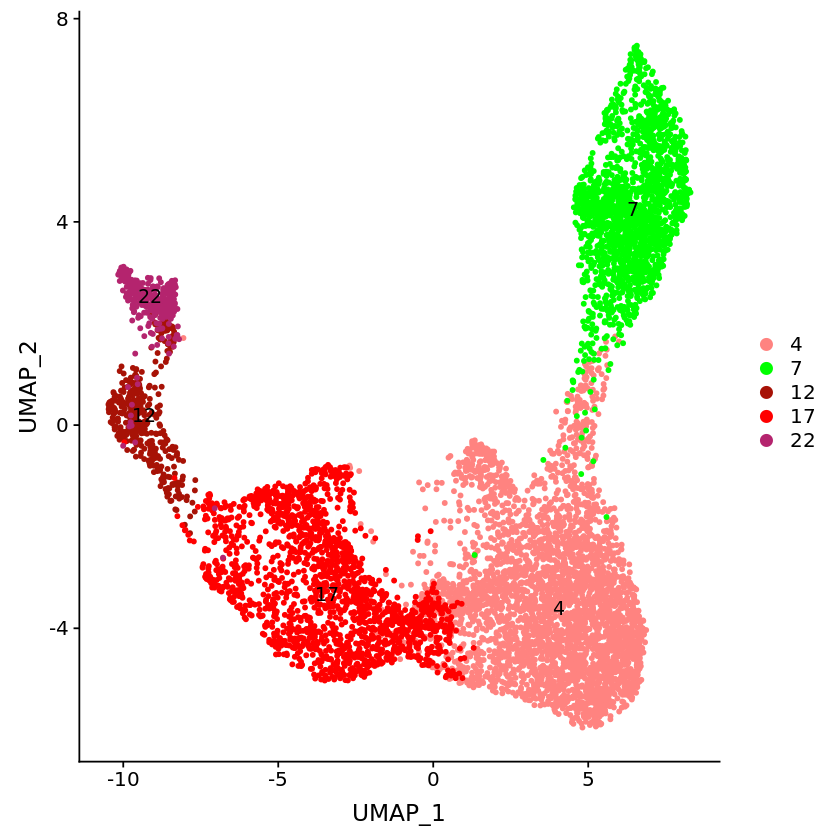

In [128]:
DimPlot(object = updated_MouseLimb10X_Muscle,reduction = "umap",order=c(22,17,12,7,4),
        label = TRUE,pt.size=1)+scale_color_manual(values=as.vector(cell_type_color[rev(c("22","17","12","7","4"))]))

In [129]:
options(future.globals.maxSize= 8096 * 1024^2)
library(future)
plan(strategy = "multicore", workers = 30)

In [130]:
cds = partitionCells(cds)
cds = learnGraph(cds,  RGE_method = 'SimplePPT')

Warning message in igraph::graph.data.frame(relations, directed = FALSE):
“In `d' `NA' elements were replaced with string "NA"”Warning message:
“Deprecated, use tibble::rownames_to_column() instead.”

In [131]:
options(DelayedArray.block.size=1000e6)
stage = 10.5
cell_ids <- which(pData(cds)[, "stage"] == stage)
root_pr_nodes <- Cells2Nodes_3alpha(cds,cell_ids)
cds = orderCells(cds, root_pr_nodes = root_pr_nodes)
Plot1 <- plot_cell_trajectory(cds,cell_size=0.5,
                     color_by = "Seurat_ident") +
                     scale_color_manual(values = cell_type_color)
Plot2 <- plot_cell_trajectory(cds,cell_size=0.5,
                     color_by = "Pseudotime") + viridis::scale_color_viridis(option="plasma")
Plot3 <- plot_cell_trajectory(cds,cell_size=0.5,
                     color_by = "stage") + viridis::scale_color_viridis(option="plasma",discrete=TRUE)
Plot4 <- plot_cell_trajectory(cds,use_color_gradient = TRUE,cell_size=0.1,
                     markers=c("Osr1","Lum","Pdgfra","Myod1","Myog","Pax3","Pax7","Msc","Col6a3","Col1a1",
                       "Tnnt1","Tnnc1","Birc5", "Cenpa", "Top2a", "Mki67")) + scale_color_gradient(low="snow2", high="red", 
                na.value = "snow2") 
Plot5 <- plot_cell_trajectory(cds,use_color_gradient = TRUE,cell_size=0.1,
                     markers=c("Birc5", "Cenpa", "Top2a", "Mki67")) + scale_color_gradient(low="snow2", high="red", 
                na.value = "snow2")

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


In [132]:
pdf("Figures/190822_10X_Seurat3_Monocle3alpha_no_removal.pdf")

print(Plot1)
print(Plot2)
print(Plot3)
print(Plot4)
print(Plot5)

dev.off()

png 
  2

## Removal

In [133]:
cds = Seurat3ToMonocle3alpha(updated_MouseLimb10X_singlet_Muscle)
cds <- setOrderingFilter(cds,DeepGenes2)

Processing block 1/11 ... OK
Processing block 2/11 ... OK
Processing block 3/11 ... OK
Processing block 4/11 ... OK
Processing block 5/11 ... OK
Processing block 6/11 ... OK
Processing block 7/11 ... OK
Processing block 8/11 ... OK
Processing block 9/11 ... OK
Processing block 10/11 ... OK
Processing block 11/11 ... OK
Removing 25 outliers
Warning message in igraph::graph.data.frame(relations, directed = FALSE):
“In `d' `NA' elements were replaced with string "NA"”Warning message:
“Deprecated, use tibble::rownames_to_column() instead.”

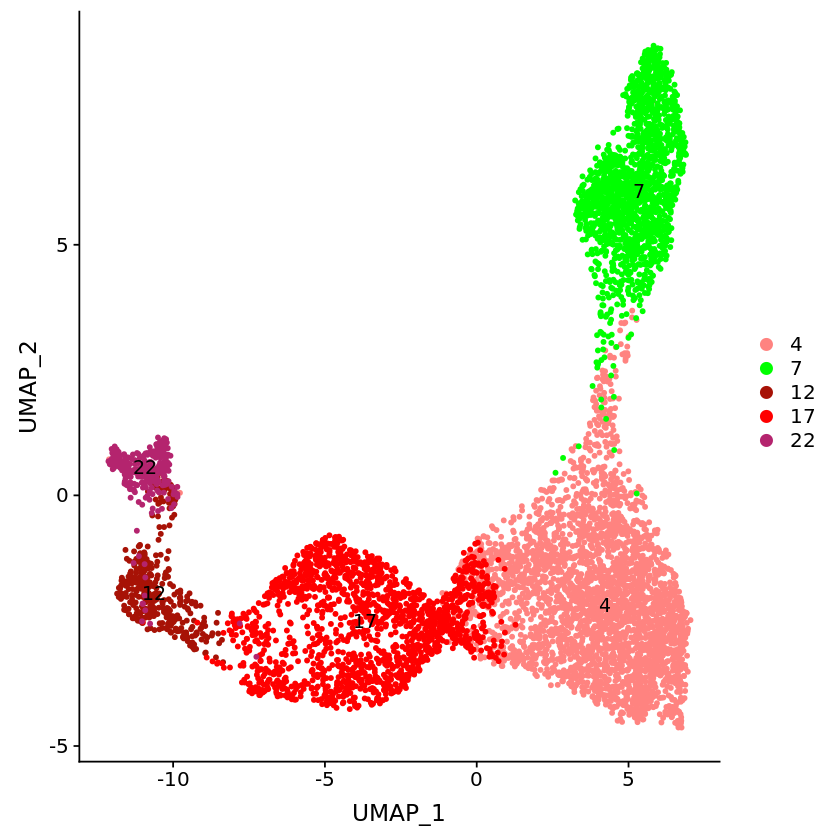

In [134]:
DimPlot(object = updated_MouseLimb10X_singlet_Muscle,reduction = "umap",order=c(22,17,12,7,4),
        label = TRUE,pt.size=1)+scale_color_manual(values=as.vector(cell_type_color[rev(c("22","17","12","7","4"))]))

In [135]:
cds = partitionCells(cds)
cds = learnGraph(cds,  RGE_method = 'SimplePPT')

Warning message in igraph::graph.data.frame(relations, directed = FALSE):
“In `d' `NA' elements were replaced with string "NA"”Warning message:
“Deprecated, use tibble::rownames_to_column() instead.”

In [136]:
options(DelayedArray.block.size=1000e6)
stage = 10.5
cell_ids <- which(pData(cds)[, "stage"] == stage)
root_pr_nodes <- Cells2Nodes_3alpha(cds,cell_ids)
cds = orderCells(cds, root_pr_nodes = root_pr_nodes)
Plot1 <- plot_cell_trajectory(cds,cell_size=0.5,
                     color_by = "Seurat_ident") +
                     scale_color_manual(values = cell_type_color)
Plot2 <- plot_cell_trajectory(cds,cell_size=0.5,
                     color_by = "Pseudotime") + viridis::scale_color_viridis(option="plasma")
Plot3 <- plot_cell_trajectory(cds,cell_size=0.5,
                     color_by = "stage") + viridis::scale_color_viridis(option="plasma",discrete=TRUE)
Plot4 <- plot_cell_trajectory(cds,use_color_gradient = TRUE,cell_size=0.1,
                     markers=c("Osr1","Lum","Pdgfra","Myod1","Myog","Pax3","Pax7","Msc","Col6a3","Col1a1",
                       "Tnnt1","Tnnc1","Birc5", "Cenpa", "Top2a", "Mki67")) + scale_color_gradient(low="snow2", high="red", 
                na.value = "snow2") 
Plot5 <- plot_cell_trajectory(cds,use_color_gradient = TRUE,cell_size=0.1,
                     markers=c("Birc5", "Cenpa", "Top2a", "Mki67")) + scale_color_gradient(low="snow2", high="red", 
                na.value = "snow2")

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


In [137]:
pdf("Figures/190822_10X_Seurat3_Monocle3alpha_removal.pdf")

print(Plot1)
print(Plot2)
print(Plot3)
print(Plot4)
print(Plot5)

dev.off()

png 
  2

In [139]:

plot_cell_trajectory

function (cds, x = 1, y = 2, color_by = "Pseudotime", show_backbone = TRUE, 
    backbone_color = "black", markers = NULL, use_color_gradient = FALSE, 
    markers_linear = FALSE, show_cell_names = FALSE, show_state_number = FALSE, 
    cell_size = 1.5, cell_link_size = 0.75, cell_name_size = 2, 
    state_number_size = 2.9, show_branch_points = TRUE, theta = 0, 
    alpha = 1, ...) 
{
    requireNamespace("igraph")
    gene_short_name <- NA
    sample_name <- NA
    sample_state <- pData(cds)$State
    data_dim_1 <- NA
    data_dim_2 <- NA
    lib_info_with_pseudo <- pData(cds)
    if (is.null(cds@dim_reduce_type) | is.null(cds@rge_method)) {
        stop("Error: dimensionality not reduced or graph is not learned yet. Please call reduceDimension(), partitionCells() and learnGraph() before calling this function.")
    }
    reduced_dim_coords <- reducedDimK(cds)
    ica_space_df <- Matrix::t(reduced_dim_coords) %>% as.data.frame() %>% 
        select_(prin_graph_dim_1 = x, prin_graph_dim_2 = y) %>% 
        mutate(sample_name = rownames(.), sample_state = rownames(.))
    dp_mst <- minSpanningTree(cds)
    if (is.null(dp_mst)) {
        stop("You must first call orderCells() before using this function")
    }
    edge_df <- dp_mst %>% igraph::as_data_frame() %>% select_(source = "from", 
        target = "to") %>% left_join(ica_space_df %>% select_(source = "sample_name", 
        source_prin_graph_dim_1 = "prin_graph_dim_1", source_prin_graph_dim_2 = "prin_graph_dim_2"), 
        by = "source") %>% left_join(ica_space_df %>% select_(target = "sample_name", 
        target_prin_graph_dim_1 = "prin_graph_dim_1", target_prin_graph_dim_2 = "prin_graph_dim_2"), 
        by = "target")
    S_matrix <- reducedDimS(cds)
    data_df <- data.frame(t(S_matrix[c(x, y), ]))
    colnames(data_df) <- c("data_dim_1", "data_dim_2")
    data_df$sample_name <- row.names(data_df)
    data_df <- merge(data_df, lib_info_with_pseudo, by.x = "sample_name", 
        by.y = "row.names")
    return_rotation_mat <- function(theta) {
        theta <- theta/180 * pi
        matrix(c(cos(theta), sin(theta), -sin(theta), cos(theta)), 
            nrow = 2)
    }
    rot_mat <- return_rotation_mat(theta)
    cn1 <- c("data_dim_1", "data_dim_2")
    cn2 <- c("source_prin_graph_dim_1", "source_prin_graph_dim_2")
    cn3 <- c("target_prin_graph_dim_1", "target_prin_graph_dim_2")
    data_df[, cn1] <- as.matrix(data_df[, cn1]) %*% t(rot_mat)
    edge_df[, cn2] <- as.matrix(edge_df[, cn2]) %*% t(rot_mat)
    edge_df[, cn3] <- as.matrix(edge_df[, cn3]) %*% t(rot_mat)
    markers_exprs <- NULL
    if (is.null(markers) == FALSE) {
        markers_fData <- subset(fData(cds), gene_short_name %in% 
            markers)
        if (nrow(markers_fData) >= 1) {
            markers_exprs <- reshape2::melt(as.matrix(exprs(cds[row.names(markers_fData), 
                ])))
            colnames(markers_exprs)[1:2] <- c("feature_id", "cell_id")
            markers_exprs <- merge(markers_exprs, markers_fData, 
                by.x = "feature_id", by.y = "row.names")
            markers_exprs$feature_label <- as.character(markers_exprs$gene_short_name)
            markers_exprs$feature_label[is.na(markers_exprs$feature_label)] <- markers_exprs$Var1
        }
    }
    if (is.null(markers_exprs) == FALSE && nrow(markers_exprs) > 
        0) {
        data_df <- merge(data_df, markers_exprs, by.x = "sample_name", 
            by.y = "cell_id")
        if (use_color_gradient) {
            if (markers_linear) {
                g <- ggplot(data = data_df, aes(x = data_dim_1, 
                  y = data_dim_2)) + geom_point(aes(color = value), 
                  size = I(cell_size), na.rm = TRUE, alpha = alpha) + 
                  scale_color_viridis(name = paste0("value"), 
                    ...) + facet_wrap(~feature_label)
            }
            else {
                g <- ggplot(data = data_df, aes(x = data_dim_1, 
                  y = data_dim_2)) + geom_point(aes(color 